# Tensorflow Project

This is a small project to showcase some data visualization, feature engineering, and using tensorflow to predict whether or not a mortgage loan will be repaid. We are using a LendingClub dataset found on Kaggle. 

The df_info data frame contains a text description of what each column in the dataset means.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_info = pd.read_csv('lending_club_info.csv', index_col = 'LoanStatNew')

In [3]:
df_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
df = pd.read_csv('lending_club_loan_two.csv')

In [5]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

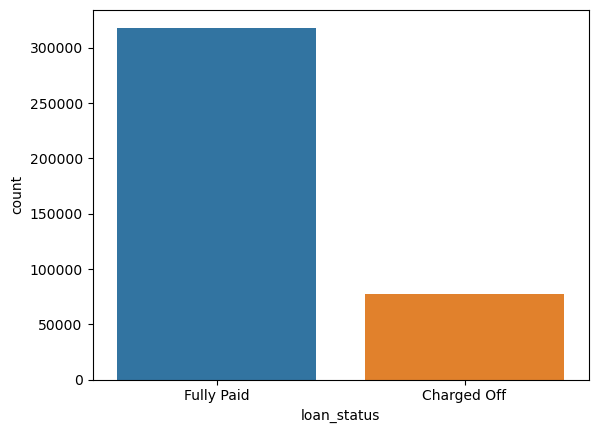

In [8]:
#We can see here we have relatively imbalanced data sets, with most loans as fully paid off
sns.countplot(x = 'loan_status', data = df)
plt.show()

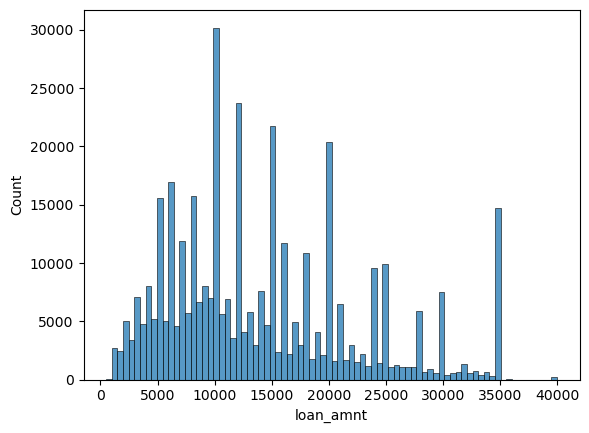

In [9]:
sns.histplot(data = df, x = 'loan_amnt', bins = 80)
plt.show()

We can see the loan amounts are between a few hundred dollars and $40,000. The majority of loans appear to be at even values such as $10,000 and $15,000.

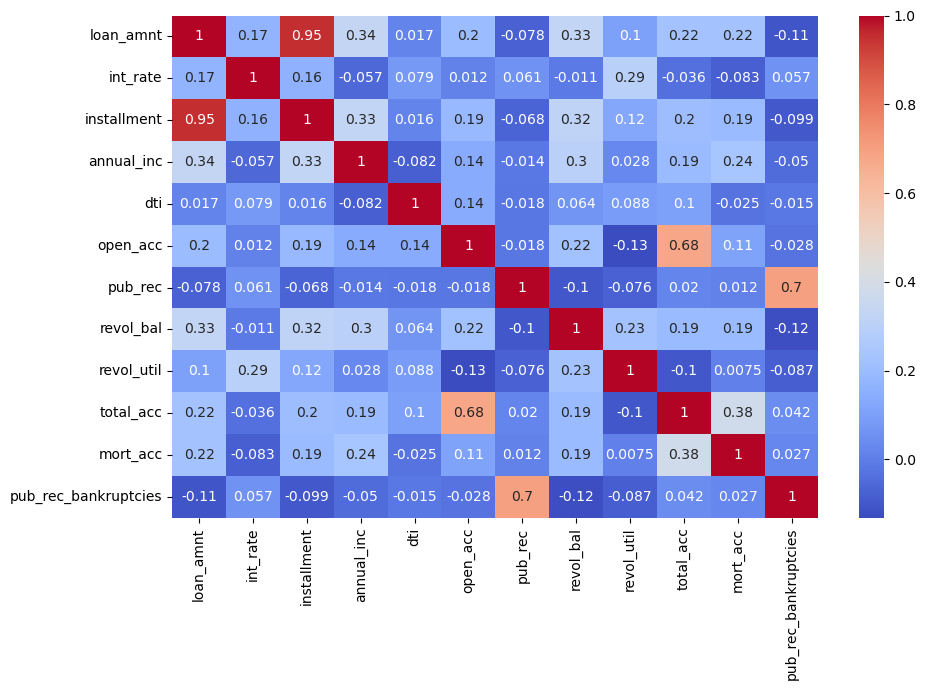

In [10]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.tight_layout()
plt.show()

It looks like we have near-perfect correlation between installment and price. Let's take a look at what this is!

In [11]:
df_info.loc['installment']['Description']

'The monthly payment owed by the borrower if the loan originates.'

It looks like the installment shows how much monthly payments are, which makes sense that it correlates with the loan amount


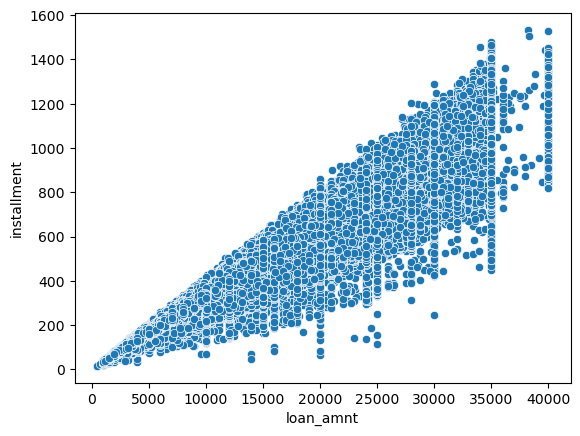

In [12]:
sns.scatterplot(x = 'loan_amnt', y = 'installment', data = df)
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

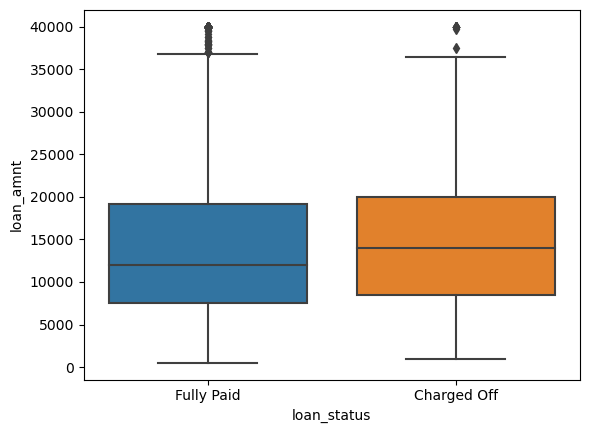

In [13]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

There doesn't seem to be much difference between the loan amounts of charged off vs. fully paid loans. Maybe charged off is on average higher, but not much higher

In [14]:
df.groupby(by = 'loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [15]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [16]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

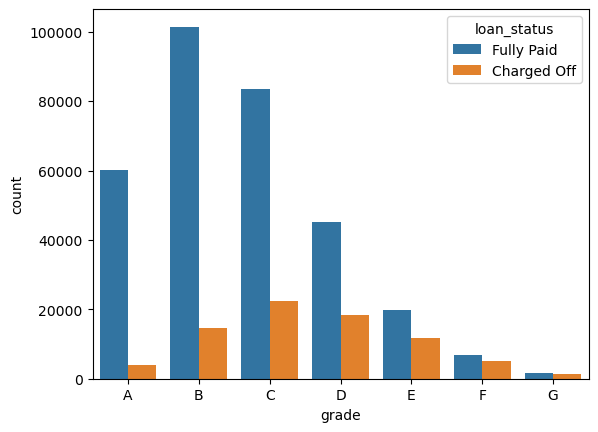

In [17]:
grade_order = sorted(df['grade'].unique())
sns.countplot(x = 'grade', data = df, hue = 'loan_status', order = grade_order)

From the graph, it seems pretty clear that the lower the grade, the higher percentage of loans that are charged off

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

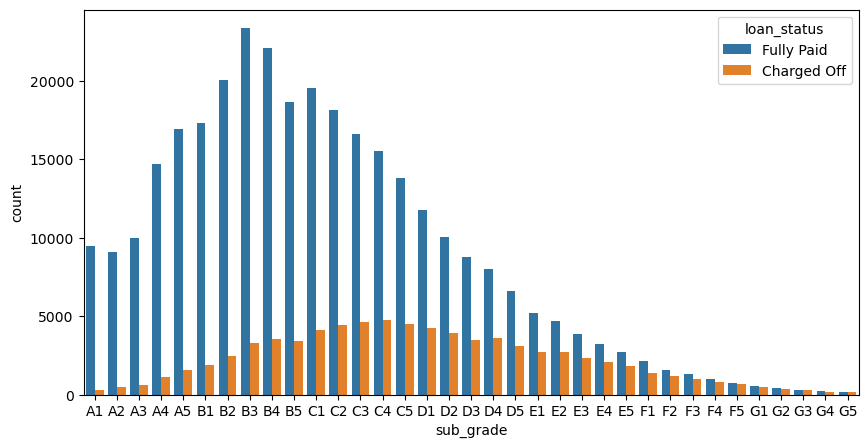

In [18]:
sub_grade_order = sorted(df['sub_grade'].unique())
plt.figure(figsize = (10,5))
sns.countplot(x = 'sub_grade', data = df, hue = 'loan_status' , order = sub_grade_order)

Let's take an isolated look at just grades F and G

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

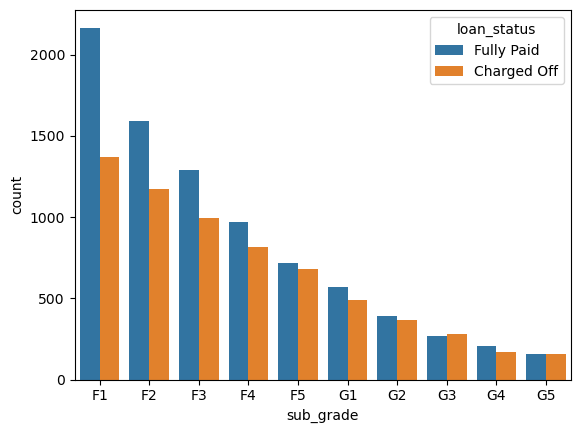

In [19]:
f_and_g = df[(df['grade'] == 'F') | (df['grade'] == 'G')]
f_and_g_sub_grade_order = sorted(f_and_g['sub_grade'].unique())

sns.countplot(x = 'sub_grade', data = f_and_g, order = f_and_g_sub_grade_order, hue = 'loan_status')

In [20]:
df['loan_repaid'] = np.where(df['loan_status'] == 'Fully Paid', 1, 0)
#We're using one hot encoding to covnert the loan status column to a numeric column

In [21]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

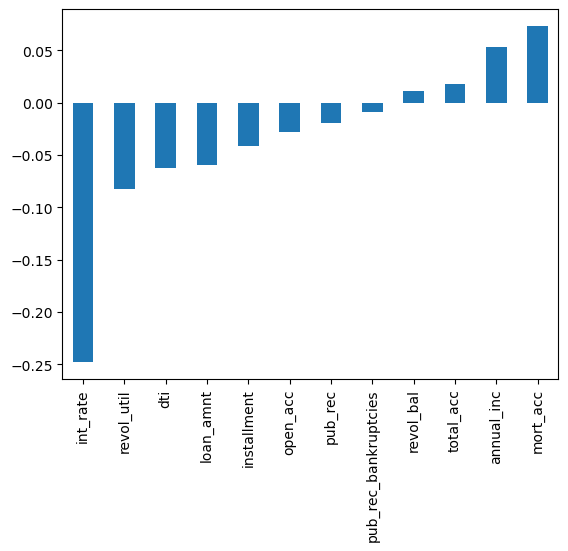

In [22]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')
#Now we're taking a look to see if there are any interesting correlations between our new loan repaid column and the rest of the data set

In [23]:
len(df)

396030

In [24]:
df.isnull().sum()/len(df)
#We can see we have 6 columns that are missing some data. Let's start with the emp_title and emp_length, which are 
#employment title and length

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [25]:
df['emp_title'].value_counts()
#There are too many unique values to try one hot encoding, so we'll just take this out

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [26]:
df.drop('emp_title', axis = 1, inplace = True)

Now, we're going to look at a countplot by employment. We use the order parameter to order the x axis from least to greatest years

In [27]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [28]:
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

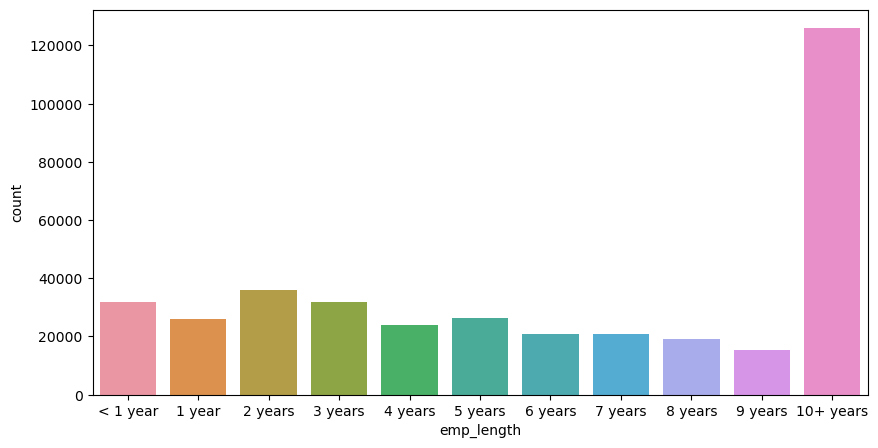

In [29]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'emp_length', order = emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

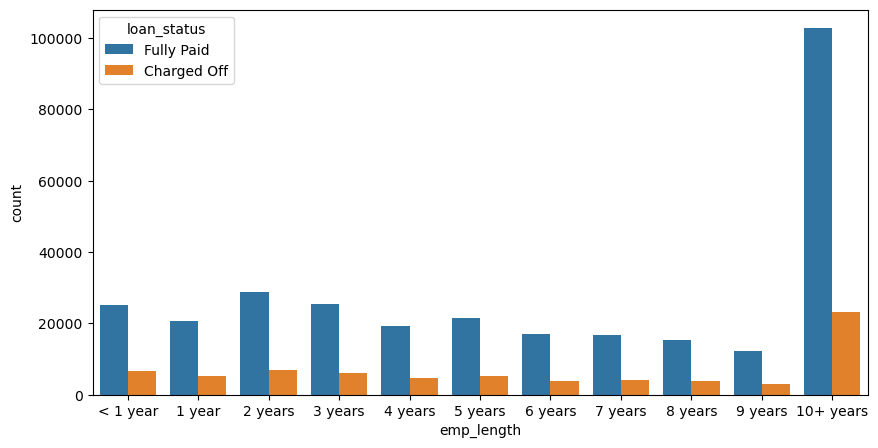

In [30]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'emp_length', order = emp_length_order, hue = 'loan_status')

<AxesSubplot:xlabel='emp_length'>

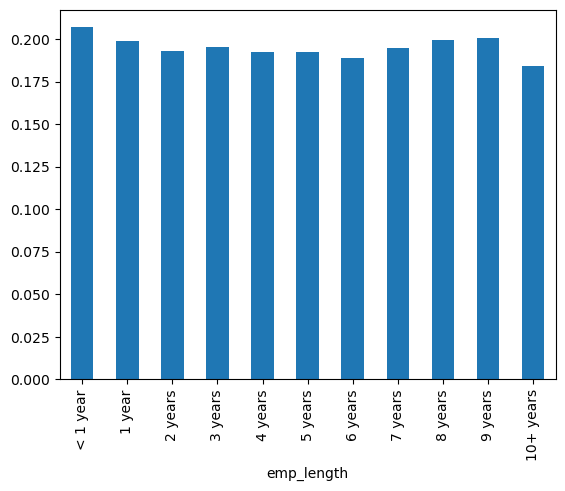

In [31]:
(1 - df.groupby('emp_length')['loan_repaid'].mean().loc[emp_length_order]).plot(kind = 'bar')
#Looks like charge off rates are very similar between the employment lengths, so we'll drop it

In [32]:
df.drop('emp_length', axis = 1, inplace = True)

In [33]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [34]:
#Next is the title column. It looks like this is the reason for the loan
df_info.loc['title']['Description']

'The loan title provided by the borrower'

In [35]:
df['title'].value_counts().head(10)

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Major purchase               4769
Consolidation                3852
debt consolidation           3547
Business                     2949
Debt Consolidation Loan      2864
Name: title, dtype: int64

It looks like this is just a lot of string values, and not formatted consistently. We'll remove it too

In [36]:
df.drop('title', axis = 1, inplace = True)

In [37]:
df_info.loc['mort_acc']['Description']
#This is the number of mortgage accounts

'Number of mortgage accounts.'

We have some missing values for the number of mortage accounts owned. So we'll impute the values of the mortgage accounts by comparing them to the number of total accounts and replacing them

In [38]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [39]:
df.corr()['mort_acc'].sort_values(ascending = False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [40]:
total_account_avg = df.groupby('total_acc')['mort_acc'].mean()

In [41]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_account_avg[total_acc]
    else:
        return mort_acc

In [42]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)

In [43]:
df.isna().sum()
#Because it's so small, we'll just drop the remaining NAs

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [44]:
df.dropna(inplace = True)

In [45]:
df.isna().sum()
#There, no more null values!

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Our next goal is to encode all all of the non-numeric columns to convert them to numeric

In [46]:
#Now let's check the non-numeric columns so we can do one hot encoding
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [47]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))
#Term consists of either 36 months or 60 months, so we'll convert it to an integer number of months

In [48]:
df.drop('grade', axis = 1, inplace = True)
#We'll remove the grade column, as the subgrade column already contains the grade

In [49]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first = True)

In [50]:
df = pd.concat([df.drop('sub_grade', axis = 1), subgrade_dummies], axis = 1)

In [51]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [52]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first = True)

In [53]:
dummies

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
396026,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396027,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396028,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [54]:
df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

In [55]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df['home_ownership'].value_counts()
#Looks like most of the values are either mortage, rent, or own. We'll convert all of the other ones to the Other column

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [57]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [58]:
home_ownership_dummies = pd.get_dummies(df['home_ownership'], drop_first = True)

In [59]:
df.drop('home_ownership', axis = 1, inplace = True)

In [60]:
df = pd.concat([df, home_ownership_dummies], axis = 1)

In [61]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [63]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])
#We're converting the address column to a numeric zip code column that we'll encode as well

In [64]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [65]:
zip_code_dummies = pd.get_dummies(df['zip_code'], drop_first = True)

In [66]:
df.drop(['zip_code', 'address'], axis = 1, inplace = True)
df = pd.concat([df, zip_code_dummies], axis = 1)

In [67]:
df.drop('issue_d', axis = 1, inplace = True)
#We're removing the issue date column because the purpose of this is to see if we should issue a loan, so an issue date wouldn't
#be available

In [68]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [69]:
df_info.loc['earliest_cr_line']['Description']
#Since this reports when a borrower's earliest credit line was opened, we'll take the year value

"The month the borrower's earliest reported credit line was opened"

In [70]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [71]:
df['earliest_cr_year'] = df['earliest_cr_line']
df.drop('earliest_cr_line', axis = 1, inplace = True)

In [72]:
df.select_dtypes(['object']).columns
df.drop('loan_status', axis = 1, inplace = True)
#Now the only non integer is the loan status column, which we're predicting
#But we already have a column called loan_repaid, so we'll drop it too

## Now we'll create a model to make our predictions!

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = df.drop('loan_repaid', axis = 1).values
y = df['loan_repaid'].values
#We need to take .values because tensorflow only accepts numpy arrays, not dataframes

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [76]:
from sklearn.preprocessing import MinMaxScaler
#We're going to use minmax scaler because we want each column to be weighed equally

In [77]:
scaler = MinMaxScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation
from tensorflow.keras.constraints import max_norm

In [80]:
model = Sequential()

#The best number to use for number of units is usually equal to the number of columns, and for the hidden layers it's about half 
model.add(Dense(units = 78, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 39, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [81]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [82]:
model.fit(x = X_train, y = y_train, epochs = 25, validation_data = (X_test, y_test))

Epoch 1/25
9881/9881 [==============================] - 13s 1ms/step - loss: 0.2758 - val_loss: 0.2638
Epoch 2/25
9881/9881 [==============================] - 17s 2ms/step - loss: 0.2625 - val_loss: 0.2629
Epoch 3/25
9881/9881 [==============================] - 18s 2ms/step - loss: 0.2620 - val_loss: 0.2626
Epoch 4/25
9881/9881 [==============================] - 17s 2ms/step - loss: 0.2614 - val_loss: 0.2620
Epoch 5/25
9881/9881 [==============================] - 9s 936us/step - loss: 0.2612 - val_loss: 0.2619
Epoch 6/25
9881/9881 [==============================] - 9s 906us/step - loss: 0.2610 - val_loss: 0.2630
Epoch 7/25
9881/9881 [==============================] - 9s 905us/step - loss: 0.2607 - val_loss: 0.2621
Epoch 8/25
9881/9881 [==============================] - 11s 1ms/step - loss: 0.2603 - val_loss: 0.2621
Epoch 9/25
9881/9881 [==============================] - 11s 1ms/step - loss: 0.2600 - val_loss: 0.2622
Epoch 10/25
9881/9881 [==============================] - 12s 1ms/step 

In [83]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

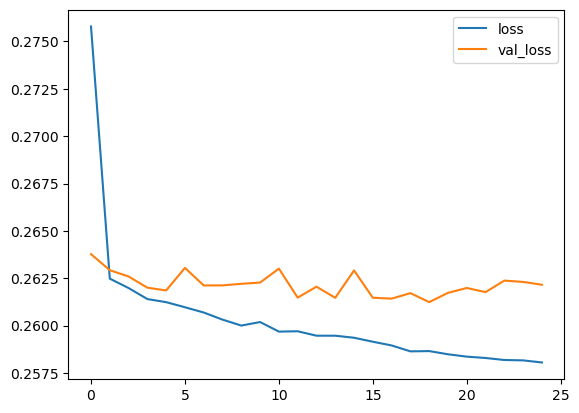

In [84]:
model_loss[['loss', 'val_loss']].plot()

In [85]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 2s 976us/step


In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
print(classification_report(y_test, predictions))
#So overall, we have a decent precision rate using tensorflow

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [88]:
print(confusion_matrix(y_test, predictions))

[[ 6737  8921]
 [   14 63372]]
